# Task : Restaurant Recommendation
## Objective:
### To Create a restaurant recommendation system based on user preferences.

### Steps:
- Preprocess the dataset by handling missingvalues and encoding categorical variables.
- Determine the criteria for restaurantrecommendations (e.g., cuisine preference, price range).
- Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.
- Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations.

### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading DataSet


In [3]:
data1 = pd.read_csv("Dataset .csv")
data1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Streamlining the Dataset

In [4]:
columns = ['Restaurant ID', 'Restaurant Name', 'Cuisines', 'City', 
           'Average Cost for two', 'Has Table booking', 'Price range', 
           'Aggregate rating', 'Rating text', 'Votes']
data = data1[columns]

### Dealing with NULL values

In [5]:
data.dropna(inplace=True)

### Sorting the restaurants by name and rating


In [6]:
data = data.sort_values(by=['Restaurant Name', 'Aggregate rating'], ascending=False)


### Filtering rows with Aggregate rating

In [7]:
data = data[data['Aggregate rating'] >= 4.0]

In [8]:
data

,Restaurant ID,Restaurant Name,Cuisines,City,Average Cost for two,Has Table booking,Price range,Aggregate rating,Rating text,Votes
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",Ankara,60,No,3,4.4,Very Good,296
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",New Delhi,1500,Yes,3,4.1,Very Good,492
9454,6401789,tashas,"Cafe, Mediterranean",Cape Town,320,No,4,4.1,Very Good,374
9385,6113857,sketch Gallery,"British, Contemporary",London,100,No,4,4.5,Excellent,148
1837,18418247,feel ALIVE,"North Indian, American, Asian, Biryani",Gurgaon,1200,Yes,3,4.7,Excellent,69
...,...,...,...,...,...,...,...,...,...,...
2484,18233317,145 Kala Ghoda,"Fast Food, Beverages, Desserts",Mumbai,1500,No,3,4.2,Very Good,1606
2292,2100784,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",Guwahati,400,No,2,4.1,Very Good,377
751,2600031,10 Downing Street,"North Indian, Chinese",Bhopal,1000,No,3,4.0,Very Good,257
2333,1400121,10 Downing Street,"North Indian, Chinese",Indore,1500,No,4,4.0,Very Good,413


### Top 10 Cuisines

In [9]:
cuisine_counter = Counter()
data['Cuisines'].str.split(',').apply(cuisine_counter.update)
top_cuisines = cuisine_counter.most_common(10)
cuisine_names, cuisine_counts = zip(*top_cuisines)

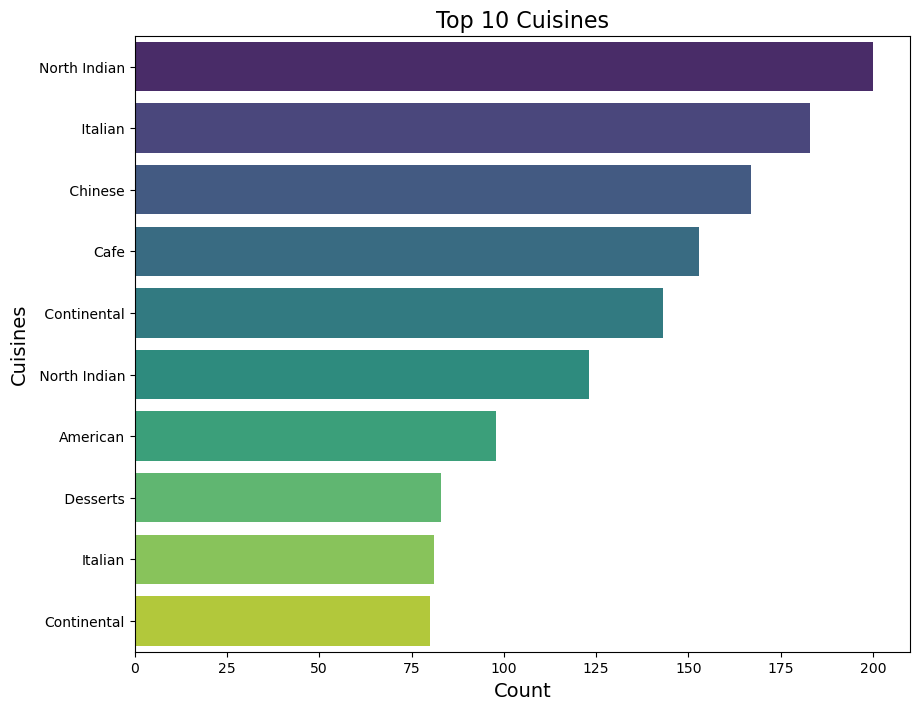

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x=list(cuisine_counts), y=list(cuisine_names), palette='viridis')
plt.title('Top 10 Cuisines', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Cuisines', fontsize=14)
plt.show()

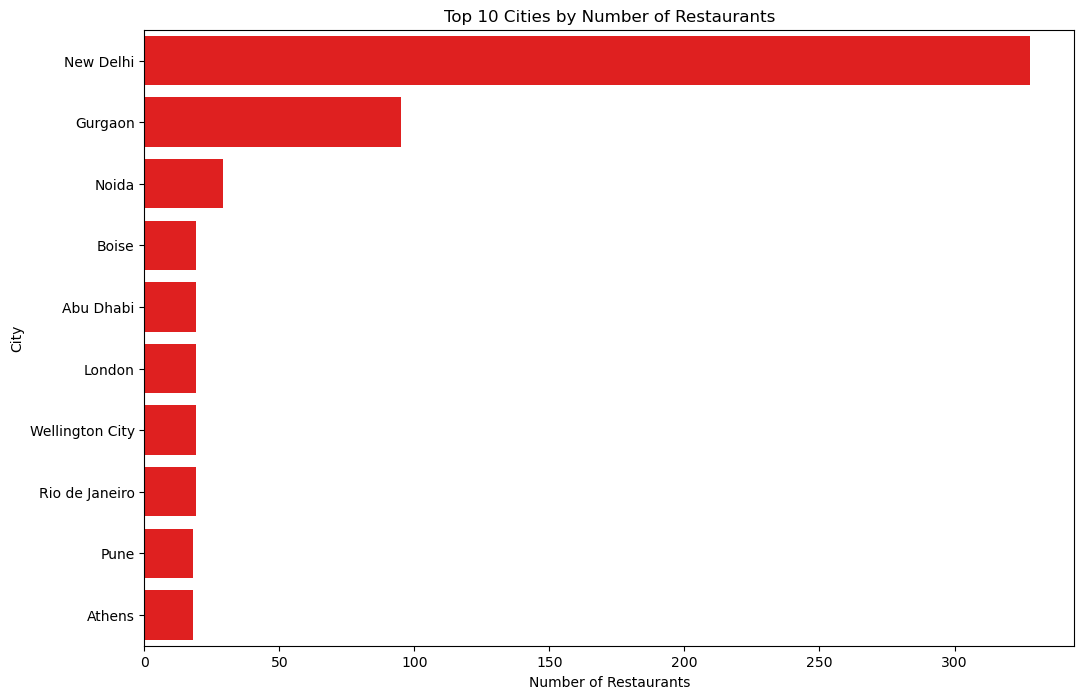

In [11]:
# Cities Vs No. Of Restaurants
plt.figure(figsize=(12, 8))
top_cities = data['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, color='red')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

### Proportion of Rating

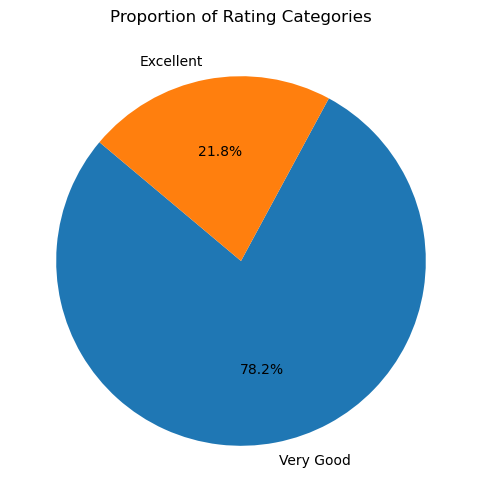

In [12]:
plt.figure(figsize=(10, 6))
rating_text_counts = data['Rating text'].value_counts()
plt.pie(rating_text_counts, labels=rating_text_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Rating Categories')
plt.show()

### Recommendation System

In [13]:
def recommend_restaurants(data, user_preferences):
    # Feature processing
    categorical_features = ['Cuisines', 'City', 'Has Table booking', 'Rating text']
    numerical_features = ['Price range']
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    scaler = StandardScaler()
    
    # Encode and scale the data
    data_encoded = encoder.fit_transform(data[categorical_features])
    data_scaled = scaler.fit_transform(data[numerical_features])
    
    data_preprocessed = np.hstack((data_scaled, data_encoded))
    
    # Encode and scale the user preferences
    user_pref_encoded = encoder.transform([[user_preferences[c] for c in categorical_features]])
    user_pref_scaled = scaler.transform([[user_preferences['Price range']]])
    
    user_pref = np.hstack((user_pref_scaled, user_pref_encoded))
    
    # Compute cosine similarity
    similarity_scores = cosine_similarity(data_preprocessed, user_pref).flatten()
    data['Similarity'] = similarity_scores
    
    # Recommend top restaurants
    recommendations = data[['Restaurant ID', 'Restaurant Name', 'Similarity']].sort_values(by='Similarity', ascending=False).head(5)
    return recommendations

# Example usage
user_preferences = {
    'Cuisines': 'Italian',
    'City': 'New York',
    'Has Table booking': 'Yes',
    'Rating text': 'Good',
    'Price range': 2
}

recommendations = recommend_restaurants(data, user_preferences)
print(recommendations)

      Restaurant ID  Restaurant Name  Similarity
811           70890  Fusilli Reasons    0.532025
9170        6507967  Tales & Spirits    0.446101
2305       18280329      Pine & Dine    0.446101
7045         307571    Wood Box Cafe    0.446101
9386        6100054      Masala Zone    0.446101
